<a href="https://colab.research.google.com/github/IT21162428/Research---Digital-Companion/blob/IT21338984_Imesh/Region_skinPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow and other dependencies
!pip install tensorflow matplotlib numpy

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [60]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
data_dir = '/content/drive/MyDrive/RESEARCH/dataset/RegionalDataset/MultiRegionFacialDataset/train'  # Replace with your dataset path

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical  # Import to_categorical

# Load dataset
data = image_dataset_from_directory(data_dir,
                                    image_size=(128, 128),  # Resize images
                                    label_mode='categorical')  # For multi-class classification


# Normalize RGB values and convert labels to one-hot encoding
data = data.map(lambda x, y: (x / 255.0, y)) # Convert labels using to_categorical

Found 18851 files belonging to 5 classes.


In [34]:
len(data)

590

In [35]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 output classes for skin types
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np # Import numpy

# Convert the EagerTensor to a NumPy array
labels = labels.numpy()

labels = labels.reshape(-1) # This converts the 2D array into a 1D array

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)  # Assign integers to each region
one_hot_labels = to_categorical(encoded_labels, num_classes=5)

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
logdir= '/content/drive/MyDrive/RESEARCH/logs/region'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
element = next(iter(train_data))  # Get the first element of the dataset using an iterator
element[0].shape

TensorShape([32, 128, 128, 3])

In [41]:
element[0]

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.02352941, 0.02352941, 0.02352941],
         [0.02401961, 0.02401961, 0.02401961],
         [0.02696078, 0.02696078, 0.02696078],
         ...,
         [0.81911767, 0.81911767, 0.81911767],
         [0.8161765 , 0.8161765 , 0.8161765 ],
         [0.8156863 , 0.8156863 , 0.8156863 ]],

        [[0.02818627, 0.02818627, 0.02818627],
         [0.02870711, 0.02870711, 0.02870711],
         [0.03183211, 0.03183211, 0.03183211],
         ...,
         [0.8192402 , 0.8192402 , 0.8192402 ],
         [0.8170343 , 0.8170343 , 0.8170343 ],
         [0.81666666, 0.81666666, 0.81666666]],

        [[0.05612745, 0.05612745, 0.05612745],
         [0.05683211, 0.05683211, 0.05683211],
         [0.06106005, 0.06106005, 0.06106005],
         ...,
         [0.8199755 , 0.8199755 , 0.8199755 ],
         [0.82218134, 0.82218134, 0.82218134],
         [0.82254905, 0.82254905, 0.82254905]],

        ...,

        [[0.03137255, 0.03137255,

In [29]:
scaled = element[0]/255

In [30]:
max_value = tf.reduce_max(scaled)  # Use tf.reduce_max to find the maximum value
print(max_value)

tf.Tensor(0.003921569, shape=(), dtype=float32)


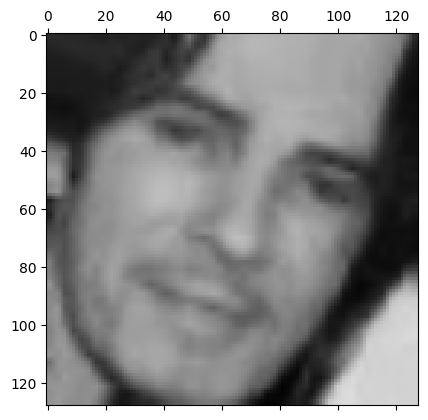

In [42]:
for images, labels in train_data.take(1):
  plt.matshow(images[0])
  plt.show()

In [54]:
history = model.fit(train_data,
                    validation_data=val_data,
                    batch_size=32,
                    epochs=20,
                    callbacks=[tensorboard_callback]
                    )


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 208ms/step - accuracy: 0.8626 - loss: 0.3276 - val_accuracy: 0.5596 - val_loss: 2.5009
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 84s 204ms/step - accuracy: 0.8648 - loss: 0.3337 - val_accuracy: 0.5659 - val_loss: 2.7661
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 210ms/step - accuracy: 0.8696 - loss: 0.3180 - val_accuracy: 0.5649 - val_loss: 2.3570
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 85s 206ms/step - accuracy: 0.8684 - loss: 0.3247 - val_accuracy: 0.5617 - val_loss: 2.3643
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 122s 295ms/step - accuracy: 0.8778 - loss: 0.2991 - val_accuracy: 0.5665 - val_loss: 2.6927
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 209ms/step - accuracy: 0.8808 - loss: 0.2803 - val_accuracy: 0.5633 - val_loss: 2.5423
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 92s 224ms/step - accuracy: 0.8778 - loss: 0.2901 - val_accuracy: 0.5559 - val_loss: 2.5940
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 90s 218ms/step - accuracy: 0.8764 - loss: 

In [55]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.2f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 50s 88ms/step - accuracy: 0.5353 - loss: 3.6487
Test Accuracy: 0.54


In [51]:
model.save('/content/drive/MyDrive/RESEARCH/models/skin_classifier_model.h5')

In [53]:
# Load an image for prediction
from tensorflow.keras.utils import load_img, img_to_array

img_path = '/content/drive/MyDrive/RESEARCH/dataset/RegionalDataset/MultiRegionFacialDataset/test/region-2/90_1_2_20170110183708997.jpg.chip.jpg'
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict skin type
predictions = model.predict(img_array)
predicted_regions = np.argmax(predictions, axis=1)  # Get the index of the highest probability
predicted_class = np.argmax(predictions)
print(f"Predicted Skin Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Skin Type: 1


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()